In [1]:
import librosa 
import librosa.display
import numpy as np

In [2]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = 10000 if len(np.diff(onset_samples)) == 0 else min(np.diff(onset_samples))   # every segment has uniform frame size
    frame_sz = 10000 if frame_sz > 10000 else frame_sz
    #print("fz"+str(frame_sz))
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2293/750389342.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['image.interpolation'] = None


In [6]:
# y, sr = librosa.load(r"C:\Users\KIST\Desktop\이승재\Drum Loop\3-Dirty Soul (432)\DTSBK144.wav")
y, sr = librosa.load('OVB85.wav')


# y = y[0]
# yt = librosa.util.normalize(y)
# yt, index = librosa.effects.trim(y=yt, top_db=10)

In [7]:
DEFAULT_SR = 22050
SEED = 41
hop_length = 256

# onset_envelope = librosa.onset.onset_strength(y=yt, sr=sr, hop_length=hop_length)
# onset_frames = librosa.util.peak_pick(onset_envelope, 50, 50, 50, 50, 1, 3)
# onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2293/3438253775.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr)


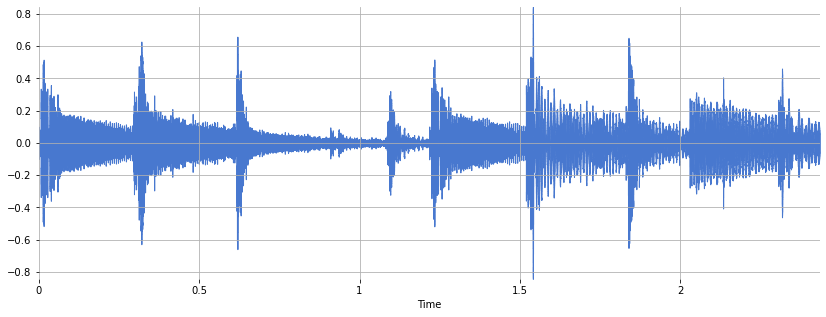

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr)

In [16]:
# S = librosa.stft(y)
# logS = librosa.amplitude_to_db(abs(S))

imsi_onset_frames = librosa.onset.onset_detect(y=y, sr=sr
            # , pre_max=0, post_max=4
            # , pre_avg=0, post_avg=4
            # , delta=0.015
            # , wait=2
            # , normalize=True
            )
onset_times = librosa.frames_to_time(imsi_onset_frames)

In [17]:
onset_times

array([0.32507937, 0.62693878, 0.95201814, 1.11455782, 1.25387755,
       1.53251701, 1.85759637, 2.04335601, 2.15945578, 2.32199546])

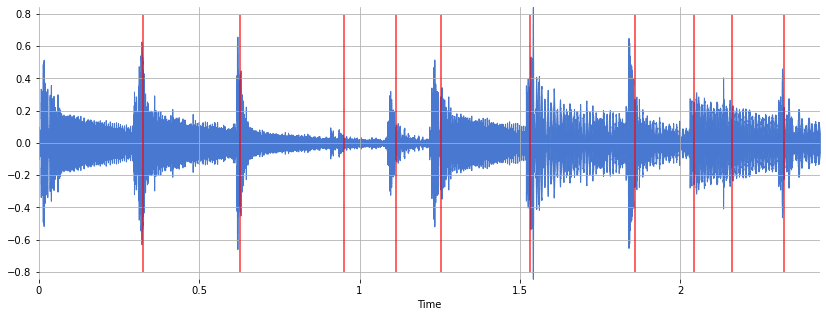

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [12]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)


In [13]:
peaks = librosa.util.peak_pick(onset_env
            , pre_max=0, post_max=3
            , pre_avg=0, post_avg=3
            , delta=0.04
            , wait=3
            )

In [14]:
times = librosa.times_like(onset_env, sr=sr)

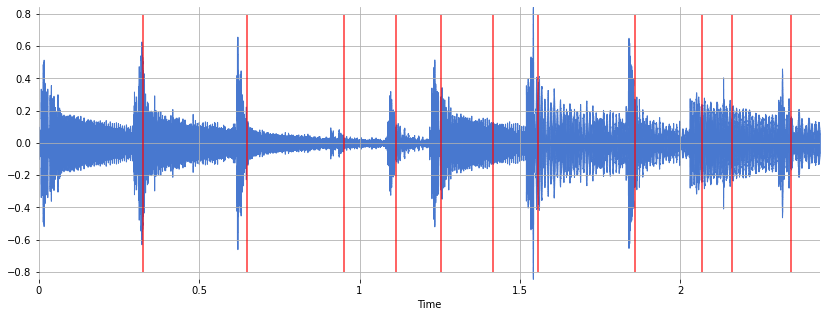

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(times[peaks], -0.8, 0.79, color='r', alpha=0.8) 

In [352]:
clicks = librosa.clicks(frames=imsi_onset_frames, sr=sr, length=len(y))
peak = librosa.clicks(frames=peaks, sr=sr, length=len(y))

In [353]:
import scipy.io


# scipy.io.wavfile.write("par_on.wav", 22050, yt+clicks)
scipy.io.wavfile.write("click.wav", 22050, clicks)
scipy.io.wavfile.write("peak.wav", 22050, peak)
# scipy.io.wavfile.write("test.wav", 22050, y)

---

In [354]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [355]:
odf_default = librosa.onset.onset_strength(y=yt, sr=sr)#, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=yt, sr=sr, #hop_length=hop_length,
                                           units='time')

ParameterError: input array must be one-dimensional

In [356]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      #hop_length=hop_length,
                                      #lag=lag, max_size=max_size)
)

NameError: name 'S' is not defined

In [357]:
onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      #hop_length=hop_length,
                                      units='time')

NameError: name 'odf_sf' is not defined

In [44]:
onset_sf

array([0.60371882, 0.78947846, 0.90557823, 1.04489796, 1.16099773,
       1.32353741, 1.43963719, 1.62539683, 1.71827664, 1.88081633,
       1.9969161 , 2.15945578, 2.2523356 , 2.43809524, 2.55419501,
       2.71673469, 2.83283447, 3.0185941 , 3.13469388, 3.29723356,
       3.41333333, 3.57587302, 3.69197279, 3.85451247, 3.97061224,
       4.15637188, 4.2492517 , 4.43501134, 4.52789116, 4.69043084,
       4.82975057, 4.99229025, 5.10839002, 5.29414966, 5.41024943,
       5.54956916, 5.66566893, 5.82820862, 5.94430839, 6.13006803,
       6.22294785, 6.40870748, 6.52480726, 6.68734694, 6.78022676,
       6.96598639, 7.08208617, 7.24462585, 7.36072562, 7.52326531,
       7.66258503, 7.80190476, 7.94122449, 8.10376417, 8.2430839 ,
       8.35918367, 8.4985034 , 8.77714286, 8.93968254])

In [48]:
sf_clicks = librosa.clicks(frames=librosa.time_to_frames(onset_sf), sr=sr, length=len(yt))

In [49]:
zz = yt + sf_clicks

In [50]:
scipy.io.wavfile.write("sur.wav", DEFAULT_SR, zz)

In [163]:
tmp, sr = librosa.load(r"output\One Eleven\drums.wav")

In [166]:
scipy.io.wavfile.write("st2mn.wav", sr, tmp)